In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# import tensorflow as tf

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

## Load the housing data using Pandas

In [2]:
 # Import our input dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Clean the Data

In [3]:
# check data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# convert date column to datetime
df['date']= pd.to_datetime(df['date'])

# check data types
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
# add separate columns for the sale year and month
df['yr_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

# drop the original date column
df.drop('date', axis=1, inplace=True)

# convert price to price in thousands
df['price(000s)'] = df['price']/1000

# drop the original price column
df.drop('price', axis=1, inplace=True)

# show updated data frame
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,price(000s)
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,221.9
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,538.0
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,180.0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,604.0
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,510.0


In [6]:
# Encode the zipcode column using get_dummies
zipcode_dummies = pd.get_dummies(df['zipcode'])

# Concatenate the original dataframe with the zipcode_dummies dataframe
df = pd.concat([df, zipcode_dummies], axis=1)

# Drop the original zipcode column and drop the lat and long columns
df = df.drop(columns=["zipcode", "lat", "long"])

# display the updated dataframe
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
 # Encoding the yr_renovated column using a custom function
def encode_renovated(yr_renovated):
    """
    This function encodes renovation status by setting any year as 1 and 0 as 0.
    """
    if yr_renovated > 0:
        return 1
    else:
        return 0

# Call the encode_renovated function on the renovated column
df["renovated"] = df["yr_renovated"].apply(encode_renovated)


# Encoding the sqft_basement column using a custom function
def encode_basement(sqft_basement):
    """
    This function encodes basement status by setting any square footage as 1 and 0 as 0.
    """
    if sqft_basement > 0:
        return 1
    else:
        return 0

# Call the encode_basement function on the basement column
df["basement"] = df["sqft_basement"].apply(encode_basement)

# Review the DataFrame 
df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98155,98166,98168,98177,98178,98188,98198,98199,renovated,basement
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,1
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#count rows before dropping rows with duplicates or NA values
print(len(df))

# drop duplicate rows
df.drop_duplicates(subset="id", keep='first', inplace=True)

# drop rows containing NA values
df.dropna(axis=0, inplace=True)

#count rows after dropping rows with duplicates or NA values
print(len(df))

# show updated data frame
df.head()

21613
21436


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98155,98166,98168,98177,98178,98188,98198,98199,renovated,basement
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,1
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


### Identify and Remove Outliers

In [9]:

#identify outliers in price data using boxplots
#boxplot = df.boxplot(column="price(000s)", showcaps=True)

In [10]:
# DROP HOUSES WITH PRICES OVER $1MILLION
df = df[df['price(000s)'] <= 1000]

In [11]:
# Determine which data points are outlier (outside of the 1.5*IQR range)
prices = df['price(000s)']
quartiles = np.quantile(prices,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

# identify outliers
# potential_outliers = [price for price in prices if price < lower_bound or price > upper_bound]

# calculate percent of data to be dropped
# print(len(potential_outliers)/len(df)*100)

# drop rows with price value lower than lower_bound (outliers)
df = df[df['price(000s)'] >= lower_bound]

#length of updated data frame
print(len(df))

# drop rows with price value higher than upper_bound (outliers)
df = df[df['price(000s)'] <= upper_bound]

# length of updated data frame
print(len(df))

# show updated df
df.head()

19979
19979


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98155,98166,98168,98177,98178,98188,98198,98199,renovated,basement
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,1
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Determine which data points are outlier (outside of the 1.5*IQR range)
bedrooms = df['bedrooms']
quartiles = np.quantile(prices,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

# identify outliers
# potential_outliers = [price for price in prices if price < lower_bound or price > upper_bound]

# calculate percent of data to be dropped
# print(len(potential_outliers)/len(df)*100)

# drop rows with number of bedrooms lower than lower_bound (outliers)
df = df[df['bedrooms'] >= lower_bound]

#length of updated data frame
print(len(df))

# drop rows with number of bedrooms higher than upper_bound (outliers)
df = df[df['bedrooms'] <= upper_bound]

# length of updated data frame
print(len(df))

# show updated df
df.head()


19979
19979


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98155,98166,98168,98177,98178,98188,98198,98199,renovated,basement
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,1
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# # plot price of all houses
# x_values = df['id']
# y_values = df['price(000s)']
# plt.scatter(x_values, y_values)


# # identify outliers in subsets using boxplots
# df.boxplot(by='bedrooms', column=["price(000s)"], grid=False)
# df.boxplot(by='bathrooms', column=["price(000s)"], grid=False)
# df.boxplot(by='floors', column=["price(000s)"], grid=False)
# df.boxplot(by='waterfront', column=["price(000s)"], grid=False)
# df.boxplot(by='view', column=["price(000s)"], grid=False)
# df.boxplot(by='condition', column=["price(000s)"], grid=False)
# df.boxplot(by='grade', column=["price(000s)"], grid=False)
# df.boxplot(by='yr_built', column=["price(000s)"], grid=False)
# df.boxplot(by='zipcode', column=["price(000s)"], grid=False)
# df.boxplot(by='yr_sold', column=["price(000s)"], grid=False)

In [14]:
# calculate approximate bin size with "n" number of bins
# n=10
# df["price(000s)"].value_counts(bins=n, sort=False)

# Bin the price(000s) column using cut with $100k intervals
#alt_price_labels = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
#price_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

alt_price_labels = [200, 400, 600, 800, 1000, 1200]
price_bins = [0, 200, 400, 600, 800, 1000, 1200]

#alt_price_labels = [100, 300, 500, 700, 900, 1100]
#price_bins = [0, 100, 300, 500, 700, 900, 1100]

# price_labels = ["0 to 100k",
#    "100k to 200k",
#    "200k to 300k",
#    "300k to 400k",
#    "400k to 500k",
#    "500k to 600k",
#    "600k to 700k",
#    "700k to 800k",
#    "800k to 900k",
#    "900k to 1000k",
#    "1000k to 1100k",
#    "1100k to 1200k"]
df["price_bins"] = pd.cut(df["price(000s)"], bins=price_bins, labels=alt_price_labels)

# Display the updated dataframe
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98166,98168,98177,98178,98188,98198,98199,renovated,basement,price_bins
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,1,0,0,0,0,0,400
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,1,1,600
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,200
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,1,800
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,600


In [15]:
 # Scaling the numeric columns
#data_scaled = StandardScaler().fit_transform(df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
#       'floors', 'view', 'condition', 'grade', 'sqft_above',
#       'sqft_basement', 'yr_built', 'yr_renovated',
#       #'zipcode', 'lat', 'long',
#       'sqft_living15', 'sqft_lot15', 'yr_sold', 'month_sold']])

# Review the scaled data
#data_scaled

In [16]:
# Create a DataFrame of the scaled data
#data_scaled_df = pd.DataFrame(data_scaled, columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
#                                                'floors', 'view', 'condition', 'grade', 'sqft_above',
#                                                'sqft_basement', 'yr_built', 'yr_renovated',
#                                                #'zipcode', 'lat', 'long',
#                                                'sqft_living15', 'sqft_lot15', 'yr_sold', 'month_sold'])

# Replace the original data with the columns of information from the scaled Data
#df["bedrooms"] = data_scaled_df["bedrooms"]
#df["bathrooms"] = data_scaled_df["bathrooms"]
#df["sqft_living"] = data_scaled_df["sqft_living"]
#df["sqft_lot"] = data_scaled_df["sqft_lot"]
#df["floors"] = data_scaled_df["floors"]
#df["view"] = data_scaled_df["view"]
#df["condition"] = data_scaled_df["condition"]
#df["grade"] = data_scaled_df["grade"]
#df["sqft_above"] = data_scaled_df["sqft_above"]
#df["sqft_basement"] = data_scaled_df["sqft_basement"]
#df["yr_built"] = data_scaled_df["yr_built"]
#df["yr_renovated"] = data_scaled_df["yr_renovated"]
##df["zipcode"] = data_scaled_df["zipcode"]
##df["lat"] = data_scaled_df["lat"]
##df["long"] = data_scaled_df["long"]
#df["sqft_living15"] = data_scaled_df["sqft_living15"]
#df["sqft_lot15"] = data_scaled_df["sqft_lot15"]
#df["yr_sold"] = data_scaled_df["yr_sold"]
#df["month_sold"] = data_scaled_df["month_sold"]


# Review the DataFrame
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98166,98168,98177,98178,98188,98198,98199,renovated,basement,price_bins
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,1,0,0,0,0,0,400
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,1,1,600
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,200
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,1,800
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,400
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,400
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,600
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,400


In [17]:
no_null_df = df.dropna()
no_null_df.columns = no_null_df.columns.astype(str)

# Data Splitting

In [18]:
 # Remove housing price target from features data
y = no_null_df["price_bins"].values
X = no_null_df.drop(columns=["price_bins","price(000s)"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)

# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [20]:
# Create a linear regression model with scikit-learn
model = LinearRegression()
# Fit the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:

# Make predictions
predictions = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error : ', mse)
print('Root Mean Squared Error : ', rmse)
print('R-squared : ', r2)

Mean Squared Error :  9655.428221634273
Root Mean Squared Error :  98.26203855830731
R-squared :  0.7572732083900824


In [22]:
# Create a random forest classifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4"], 
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,37,171,1,0,0
Actual 1,17,1739,210,14,0
Actual 2,1,278,1160,156,22
Actual 3,0,16,318,411,76
Actual 4,0,3,44,139,182


Accuracy Score : 0.7065065065065065
Classification Report
              precision    recall  f1-score   support

         200       0.67      0.18      0.28       209
         400       0.79      0.88      0.83      1980
         600       0.67      0.72      0.69      1617
         800       0.57      0.50      0.53       821
        1000       0.65      0.49      0.56       368

    accuracy                           0.71      4995
   macro avg       0.67      0.55      0.58      4995
weighted avg       0.70      0.71      0.69      4995



In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X_test.columns), reverse=True)[:15]

[(0.08424393718093684, 'sqft_living'),
 (0.08071194761025774, 'sqft_living15'),
 (0.07408944108423829, 'sqft_above'),
 (0.07259387143437535, 'yr_built'),
 (0.06757342247141027, 'sqft_lot15'),
 (0.06561833892823814, 'sqft_lot'),
 (0.05974620486370634, 'grade'),
 (0.05949593253328866, 'id'),
 (0.03908914932240629, 'month_sold'),
 (0.03498263544082728, 'bathrooms'),
 (0.028561858360541353, 'sqft_basement'),
 (0.021401937244208434, 'bedrooms'),
 (0.01794045806414839, 'condition'),
 (0.015169136889719553, 'floors'),
 (0.010491492759259065, 'yr_sold')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

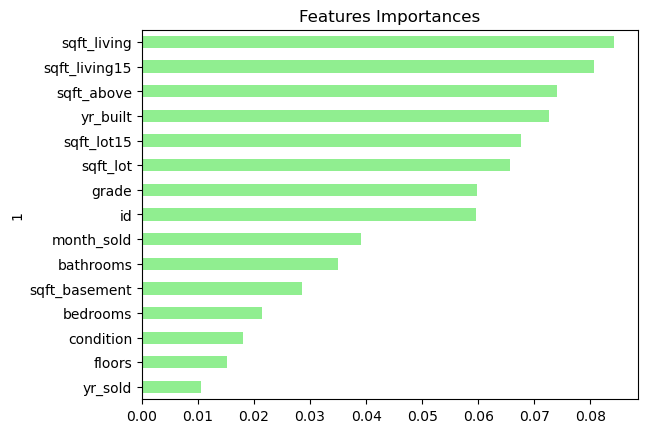

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[:15])
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Model Evaluation